# Radar charts

This notebook describes how the radar charts have been generated from the data provided by the member-states.

One starts off from importing the relevant libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

The data are then imported and curated so as to easily analyse the relevant information.

In [ ]:
data = pd.read_excel('SC82_D02.01(b) Finalised version of the LIFO monitoring mechanism_W1scores.xlsx',sheet_name='Questionnaire',
                     header=2,usecols=[1,9,13,14,15,16,17,18,19,20,21]).set_index(['Focus Areas','Id'])
data = data.loc[data.index.dropna()]

The answers are eventually normalised against the theoretical maximum value for primary indicators and secondary indicators, _i.e., QX.X_ and _SX.X_ sets.

In [ ]:
data = pd.concat([data,pd.DataFrame(columns=[d+str('_normalised') for d in data.columns[:-1].values])],axis=1)

In [ ]:
data[[d+str('_normalised') for d in data.columns[:-9].values]]=np.divide(data.iloc[:,:-9].values.T,data['max'].values).T

## Radar charts
The plots are eventually drawn per focus area and with all the indicators together

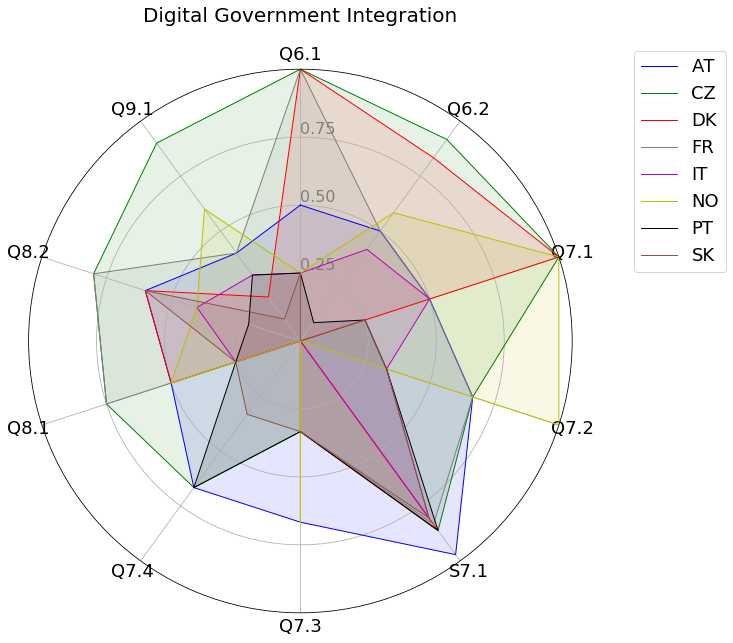

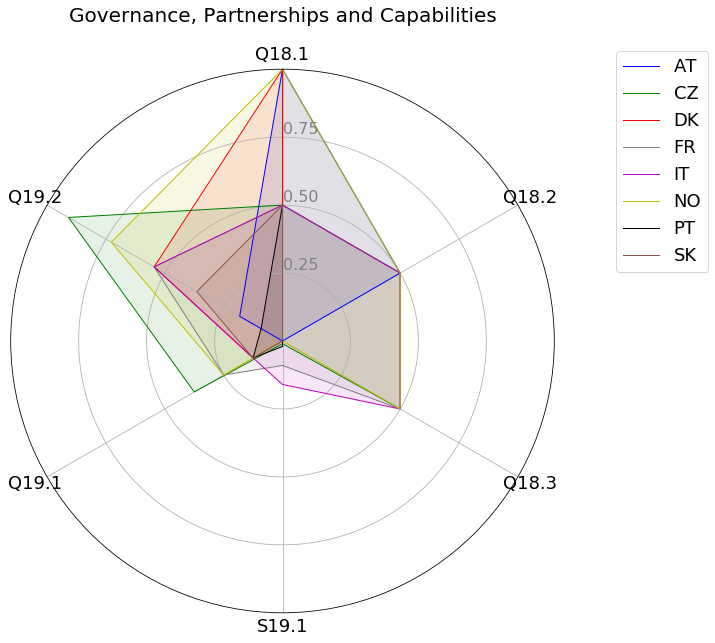

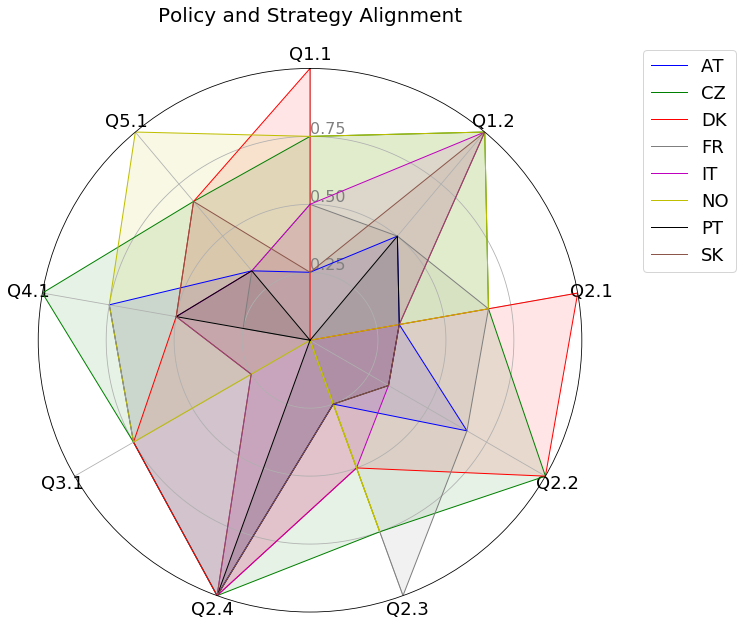

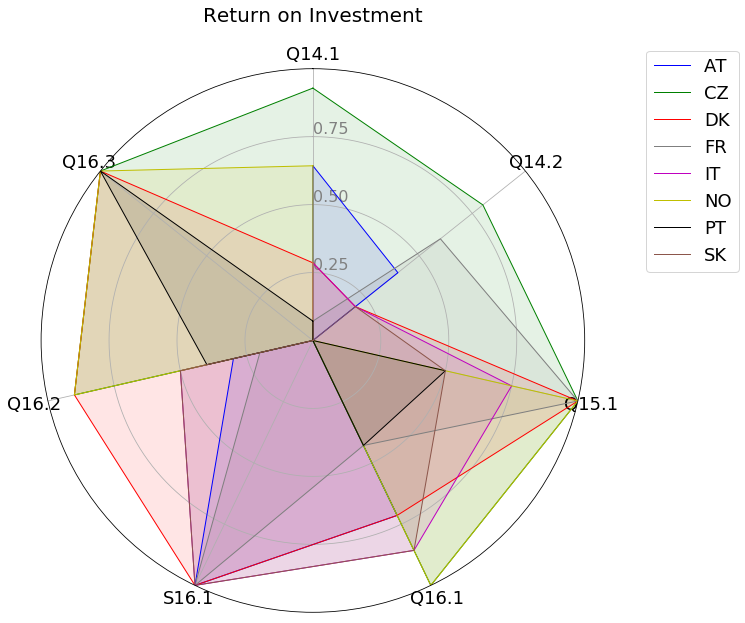

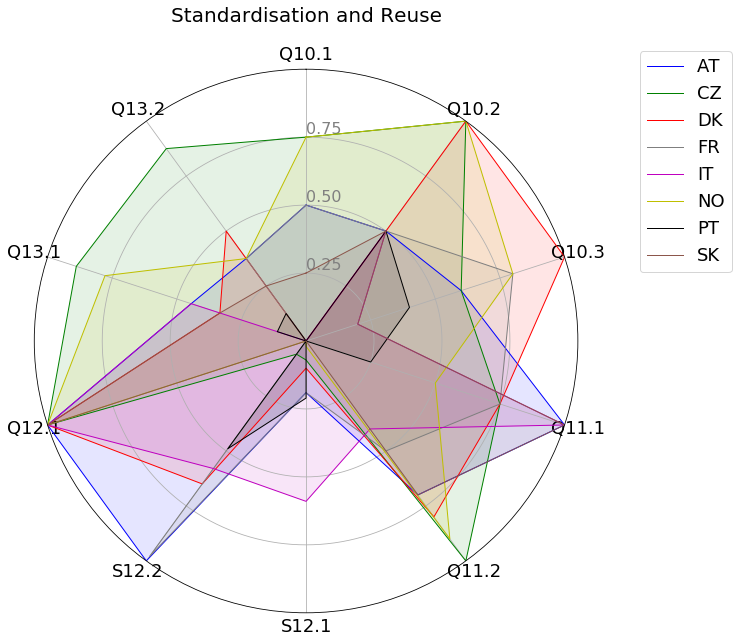

In [93]:
plt.rc('xtick', labelsize=18)

for ig, g in data.groupby('Focus Areas'):
    plt.figure(figsize=(15,10))
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n/float(len(g)) * 2 * np.pi for n in range(len(g))]
    angles += angles[:1]

    # Initialise the radar plot
    ax = plt.subplot(111, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], g.index.get_level_values(1))
    
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([.25,.50,.75], ["0.25","0.50","0.75"], color="grey", size=16)
    plt.ylim(0,1)

    colors = ['b','g','r','tab:gray','m','y','k','tab:brown']

    # ------- PART 2: Add plots

    # Plot each individual = each line of the data
    co = -1
    for ex in g.iloc[:,-8:]:
        co+=1
        values=g[ex].values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, colors[co], linewidth=1, linestyle='solid', label=ex[:2])
        ax.fill(angles, values, colors[co], alpha=0.1)
        ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.05),prop={'size': 18})
        ax.set_title(ig,pad=20,fontsize = 20)
    plt.show()

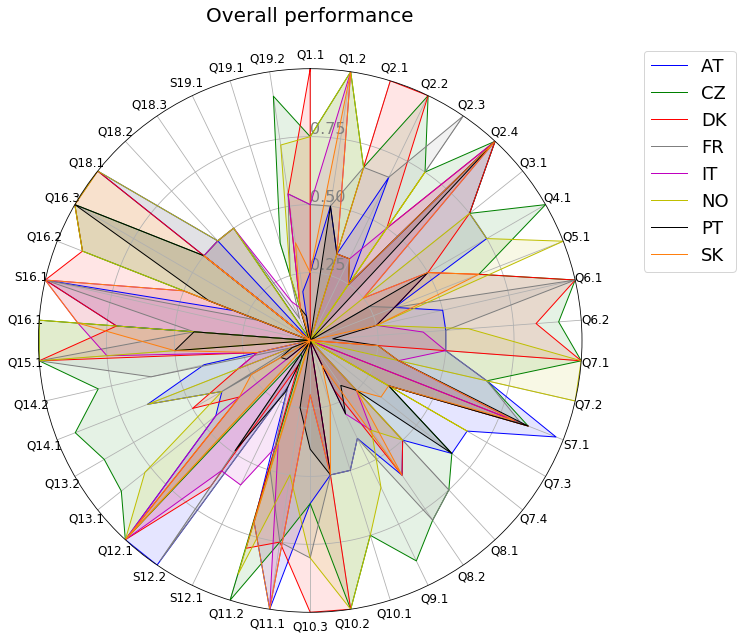

In [94]:
plt.rc('xtick', labelsize=12)
plt.figure(figsize=(15,10))
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n/float(len(data)) * 2 * np.pi for n in range(len(data))]
angles += angles[:1]

# Initialise the radar plot
ax1 = plt.subplot(111, polar=True)

# If you want the first axis to be on top:
ax1.set_theta_offset(np.pi / 2)
ax1.set_theta_direction(-1)

# Draw one axis per variable + add labels labels yet
plt.xticks(angles[:-1], data.index.get_level_values(1))

# Draw ylabels
ax1.set_rlabel_position(0)
plt.yticks([.25,.50,.75], ["0.25","0.50","0.75"], color="grey", size=16)
plt.ylim(0,1)

colors = ['b','g','r','tab:gray','m','y','k','tab:orange']

# ------- PART 2: Add plots

# Plot each individual = each line of the data
co = -1
for ex in data.iloc[:,-8:]:
    co+=1
    values=data[ex].values.flatten().tolist()
    values += values[:1]
    ax1.plot(angles, values, colors[co], linewidth=1, linestyle='solid', label=ex[:2])
    ax1.fill(angles, values, colors[co], alpha=0.1)
    ax1.legend(loc='upper right', bbox_to_anchor=(1.3, 1.05),prop={'size': 18})
    ax1.set_title('Overall performance',pad=20,fontsize=20)
plt.show()